In [121]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import butter, lfilter, freqz

In [122]:
# sampling information
Fs = 100    #sampling rate
Ts = 1/Fs   #sampling period
T = 1       #seconds of sampling
N = Fs*T    #total points in signal
f = [7,12,19]

In [123]:
# signal information

omega7 = 2*np.pi*f[0]    # angular frequency for sine waves
t_vec7 = np.arange(N)*Ts  # time 
sig7 = np.sin(omega7*t_vec7) # sine wave generation

omega12 = 2*np.pi*f[1] 
t_vec12 = np.arange(N)*Ts 
sig12 = np.sin(omega12*t_vec12) 

omega19 = 2*np.pi*f[2] 
t_vec19 = np.arange(N)*Ts 
sig19 = np.sin(omega19*t_vec19) 

In [124]:
sig0 = sig7 + sig12 + sig19

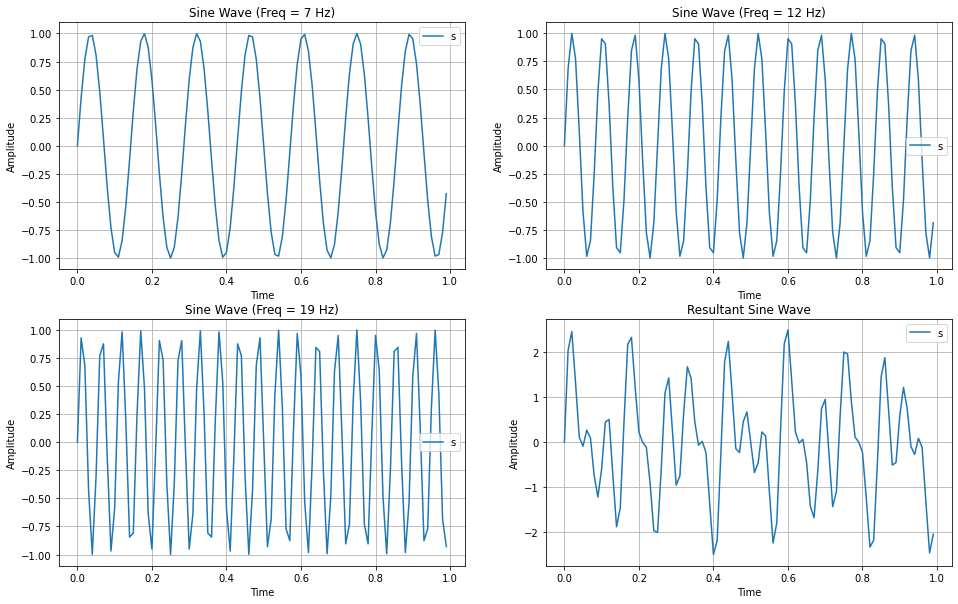

In [125]:
#PLOTTING SINE WAVE
plt.figure(figsize=(16, 10))

plt.subplot(2,2,1)
plt.plot(t_vec7,sig7)
plt.title('Sine Wave (Freq = 7 Hz)')
plt.legend('show')
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(2,2,2)
plt.plot(t_vec7,sig12)
plt.title('Sine Wave (Freq = 12 Hz)')
plt.legend('show')
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(2,2,3)
plt.plot(t_vec7,sig19)
plt.title('Sine Wave (Freq = 19 Hz)')
plt.legend('show')
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(2,2,4)
plt.plot(t_vec7,sig0)
plt.title('Resultant Sine Wave')
plt.legend('show')
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.show()

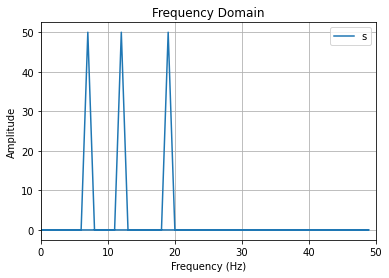

In [126]:
#FOURIER TRANSFORM
X = fft(sig0)
freqs = fftfreq(len(sig0)) * Fs

plt.figure(3)
plt.plot(freqs,np.abs(X))
plt.title('Frequency Domain')
plt.legend('show')
plt.grid(True)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim(0,Fs/2)
plt.show()

In [127]:
#CREATING FILTER TO ALLOW ONLY 12Hz TO PASS
lowcut = 11.9
highcut = 12.1
order = 1
nyq = 0.5 * Fs
low = lowcut / nyq
high = highcut / nyq
b, a = butter(order, [low, high], btype='band')

#APPLYING FILTER
sig_filtered = lfilter(b, a, sig0)

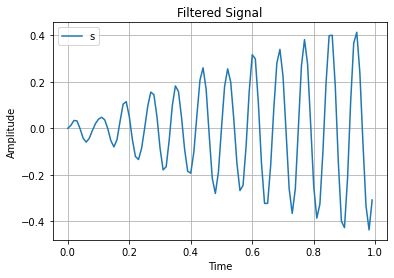

In [128]:
plt.plot(t_vec7,sig_filtered)
plt.title('Filtered Signal')
plt.legend('show')
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.show()

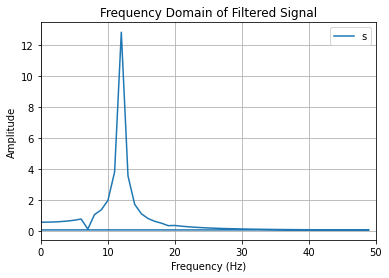

In [129]:
#FOURIER TRANSFORM OF FILTERED SIGNAL
X_filt = fftpack.fft(sig_filtered)
freqs_filt = fftpack.fftfreq(len(sig_filtered)) * Fs

plt.figure(3)
plt.plot(freqs_filt,np.abs(X_filt))
plt.title('Frequency Domain of Filtered Signal')
plt.legend('show')
plt.grid(True)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim(0,Fs/2)
plt.show()